In [1]:
%matplotlib inline

In [2]:
from galsize_models.measurements import load_umachine_sdss_with_meert15
full_sdss, behroozi_complete = load_umachine_sdss_with_meert15()
no_data_mask = np.isnan(full_sdss['Magr_tot_meert15'])

mask = ~no_data_mask & behroozi_complete
sdss = full_sdss[mask]

from galsize_models.models.kravtsov13 import halo_radius_vs_stellar_mass
sdss['rvir_halo_kpc'] = halo_radius_vs_stellar_mass(10**sdss['sm'])

print(sdss.keys())
print("\nNumber of galaxies in complete sample = {0}".format(len(sdss)))


['ra', 'dec', 'z', 'bptclass', 'sm', 'sfr', 'specsfr', 'sm_fib', 'sfr_fib', 'specsfr_fib', 'withinr', 'eligiblehost', 'sm_complete', 'eligiblehost2', 'd4000', 'd4000_sub', 'd4000_n', 'd4000_n_sub', 'has_match', 'logM_mendel13', 'logMB_mendel13', 'logMD_mendel13', 'pps_mendel13', 'type_mendel13', 'deltaBD_mendel13', 'dr7_objID', 'has_meert15_match', 'r50_magr_kpc_meert15', 'Magr_tot_meert15', 'Magr_bulge_meert15', 'Magr_disk_meert15', 'gr_bulge_meert15', 'gr_disk_meert15', 'morph_type_T_meert15', 'gr_kcorr_meert15', 'bulge_to_total_rband_meert15', 'ssfr', 'rvir_halo_kpc']

Number of galaxies in complete sample = 229889


In [3]:
from galsize_models.models.load_baseline_catalogs import load_umachine_mock
mock = load_umachine_mock()

print(mock.keys())

Total runtime = 40.08 seconds
['obs_sfr', 'icl', 'upid', 'mpeak', 'sfr', 'halo_id', 'mvir', 'rvir', 'vmax_at_mpeak', 'vx', 'a_first_infall', 'sm', 'vy', 'y', 'x', 'vz', 'z', 'dvmax_zscore', 'obs_sm', 'halo_hostid', 'host_halo_rvir', 'host_halo_mvir', 'ssfr', 'rvir_halo_kpc', 'bt_meert15_random']


In [4]:
from galsize_models.measurements.distribution_matching import distribution_matching_indices
logsm_bins = np.linspace(9.75, 11.5, 25)
idx_sm_matched = distribution_matching_indices(np.log10(mock['sm']), sdss['sm'], len(sdss))

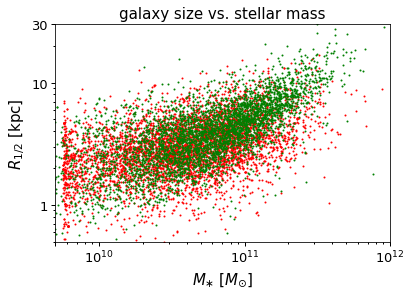

In [12]:
from galsize_models.models import component_size_vs_rhalo, galaxy_size_vs_rhalo
scatter = 0.2
norm_bulge, norm_disk = 0.02, 0.1
alpha_bulge, alpha_disk = 0.85, 0.6
mock['r50_magr_kpc_meert15'] = galaxy_size_vs_rhalo(mock['rvir_halo_kpc'], mock['bt_meert15_random'], 
                                   norm_bulge, norm_disk, alpha_bulge, alpha_disk, 
                                   scatter=scatter)

fig, ax = plt.subplots(1, 1)
__=ax.loglog()

nskip = 50
# __=ax.scatter(mock['obs_sm'][::nskip], mock['r50_magr_kpc_meert15'][::nskip], s=1, color='blue')
__=ax.scatter(mock['obs_sm'][idx_sm_matched][::nskip], mock['r50_magr_kpc_meert15'][idx_sm_matched][::nskip], s=1, color='red')
__=ax.scatter(10**sdss['sm'][::nskip], sdss['r50_magr_kpc_meert15'][::nskip], s=1, color='green')


xlim = ax.set_xlim(5e9, 1e12)
ylim = ax.set_ylim(0.5, 30)
__=ax.set_xticks((5e9, 1e10, 1e11, 1e12))
__=ax.set_yticks((1, 10, 30))
from matplotlib import ticker
__=ax.get_yaxis().set_major_formatter(ticker.ScalarFormatter())
__=ax.get_yaxis().set_minor_formatter(ticker.NullFormatter())

xlabel = ax.set_xlabel(r'$M_{\ast}$ [$M_{\odot}$]')
ylabel = ax.set_ylabel(r'$R_{1/2}$ [kpc]')
title = ax.set_title('galaxy size vs. stellar mass')


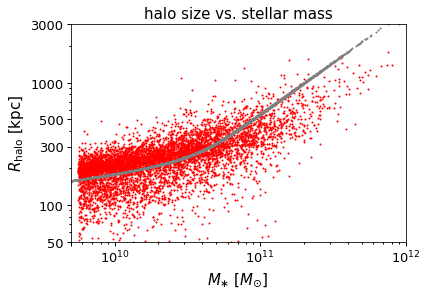

In [13]:
fig, ax = plt.subplots(1, 1)
__=ax.loglog()

nskip = 50
__=ax.scatter(mock['obs_sm'][::nskip], mock['rvir_halo_kpc'][::nskip], s=1, color='red')
__=ax.scatter(10**sdss['sm'][::nskip], sdss['rvir_halo_kpc'][::nskip], s=1, color='gray')


xlim = ax.set_xlim(5e9, 1e12)
ylim = ax.set_ylim(50, 3000)
__=ax.set_xticks((5e9, 1e10, 1e11, 1e12))
__=ax.set_yticks((50, 100, 300, 500, 1000, 3000))
from matplotlib import ticker
__=ax.get_yaxis().set_major_formatter(ticker.ScalarFormatter())
__=ax.get_yaxis().set_minor_formatter(ticker.NullFormatter())

xlabel = ax.set_xlabel(r'$M_{\ast}$ [$M_{\odot}$]')
ylabel = ax.set_ylabel(r'$R_{\rm halo}$ [kpc]')
title = ax.set_title('halo size vs. stellar mass')


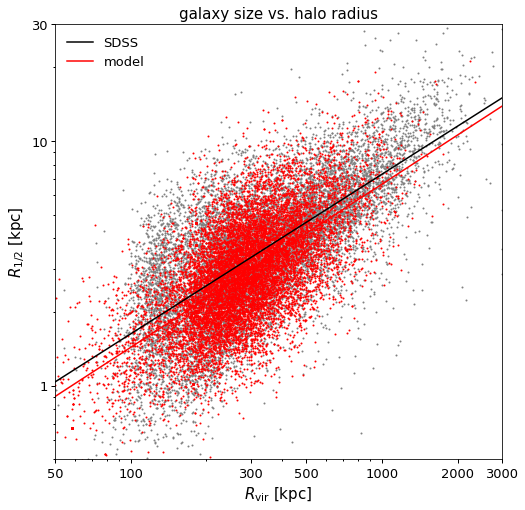

In [14]:
from galsize_models.measurements.rhalf_rvir_power_law_fit import rvir_rhalf_power_law_index_and_normalization as c1_c0_fit

alpha_sdss_all, norm_sdss_all = c1_c0_fit(sdss['r50_magr_kpc_meert15'], sdss['rvir_halo_kpc'])
alpha_model1_all_sm_corrected, norm_model1_all_sm_corrected = c1_c0_fit(mock['r50_magr_kpc_meert15'][idx_sm_matched], 
                                              mock['rvir_halo_kpc'][idx_sm_matched])
alpha_model1_all, norm_model1_all = c1_c0_fit(mock['r50_magr_kpc_meert15'], 
                                              mock['rvir_halo_kpc'])

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
__=ax.loglog()

nskip = 20
__=ax.scatter(sdss['rvir_halo_kpc'][::nskip], 
              sdss['r50_magr_kpc_meert15'][::nskip], 
              color='gray', s=1, label='')

__=ax.scatter(mock['rvir_halo_kpc'][idx_sm_matched][::nskip], 
              mock['r50_magr_kpc_meert15'][idx_sm_matched][::nskip], 
              color='red', s=1, label='')

rhalo_abscissa = np.linspace(10, 25000, 200)
__=ax.plot(rhalo_abscissa, norm_sdss_all*rhalo_abscissa**alpha_sdss_all, 
          color='k', label='SDSS')
__=ax.plot(rhalo_abscissa, norm_model1_all*rhalo_abscissa**alpha_model1_all, 
          color='red', label='model')

xlim = ax.set_xlim(50, 3000)
ylim = ax.set_ylim(0.5, 30)
__=ax.set_xticks((50, 100, 300, 500, 1000, 2000, 3000))
__=ax.set_yticks((1, 10, 30))
from matplotlib import ticker
__=ax.get_xaxis().set_major_formatter(ticker.ScalarFormatter())
__=ax.get_xaxis().set_minor_formatter(ticker.NullFormatter())
__=ax.get_yaxis().set_major_formatter(ticker.ScalarFormatter())
__=ax.get_yaxis().set_minor_formatter(ticker.NullFormatter())

xlabel = ax.set_xlabel(r'$R_{\rm vir}$ [kpc]')
ylabel = ax.set_ylabel(r'$R_{1/2}$ [kpc]')
title = ax.set_title('galaxy size vs. halo radius')
legend = ax.legend()

In [15]:
print(alpha_model1_all, norm_model1_all)
print(alpha_model1_all_sm_corrected, norm_model1_all_sm_corrected)

(0.66686192307712366, 0.066584949421269371)
(0.66691359878647516, 0.066768755513736303)


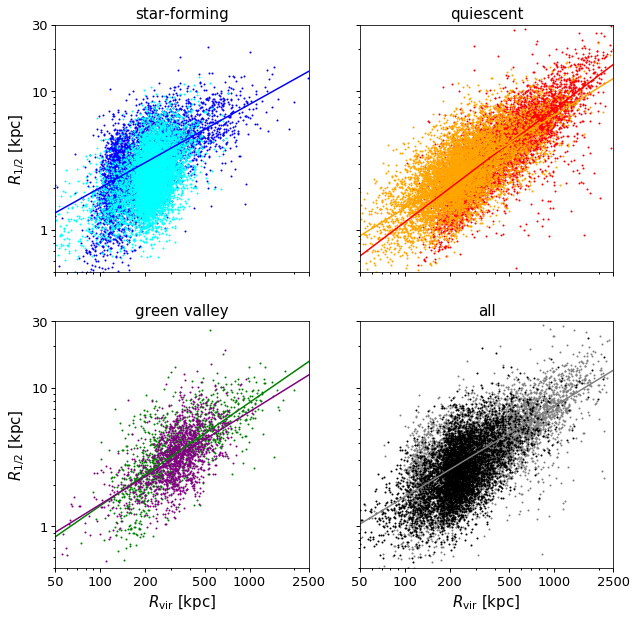

In [19]:
mask_sf = sdss['ssfr'] >= -10.75
mask_gv = (sdss['ssfr'] < -10.75) & (sdss['ssfr'] >= -11.25)
mask_q = (sdss['ssfr'] < -11.25)

mock_mask_sf = mock['ssfr'] >= -10.75
mock_mask_gv = (mock['ssfr'] < -10.75) & (mock['ssfr'] >= -11.25)
mock_mask_q = (mock['ssfr'] < -11.25)

alpha_model1_sf, norm_model1_sf = c1_c0_fit(mock['r50_magr_kpc_meert15'][mock_mask_sf], 
                                            mock['rvir_halo_kpc'][mock_mask_sf])
alpha_model1_gv, norm_model1_gv = c1_c0_fit(mock['r50_magr_kpc_meert15'][mock_mask_gv], 
                                            mock['rvir_halo_kpc'][mock_mask_gv])
alpha_model1_q, norm_model1_q = c1_c0_fit(mock['r50_magr_kpc_meert15'][mock_mask_q], 
                                            mock['rvir_halo_kpc'][mock_mask_q])
alpha_sdss_sf, norm_sdss_sf = c1_c0_fit(sdss['r50_magr_kpc_meert15'][mask_sf], 
                                            sdss['rvir_halo_kpc'][mask_sf])
alpha_sdss_gv, norm_sdss_gv = c1_c0_fit(sdss['r50_magr_kpc_meert15'][mask_gv], 
                                            sdss['rvir_halo_kpc'][mask_gv])
alpha_sdss_q, norm_sdss_q = c1_c0_fit(sdss['r50_magr_kpc_meert15'][mask_q], 
                                            sdss['rvir_halo_kpc'][mask_q])

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True, sharey=True, 
                                            figsize=(10, 10))

__=ax1.loglog(); __=ax2.loglog(); __=ax3.loglog(); __=ax4.loglog()

nskip = 20
__=ax1.scatter(sdss['rvir_halo_kpc'][mask_sf][::nskip], 
              sdss['r50_magr_kpc_meert15'][mask_sf][::nskip], 
              color='blue', s=1, label='')
__=ax1.scatter(mock['rvir_halo_kpc'][mock_mask_sf][::nskip], 
              mock['r50_magr_kpc_meert15'][mock_mask_sf][::nskip], 
              color='cyan', s=1, label='')

rhalo_abscissa = np.linspace(10, 25000, 200)
__=ax1.plot(rhalo_abscissa, norm_sdss_sf*rhalo_abscissa**alpha_sdss_sf, 
          color='blue', label='SDSS')
__=ax1.plot(rhalo_abscissa, norm_model1_sf*rhalo_abscissa**alpha_model1_sf, 
          color='cyan', label='model')


__=ax2.scatter(sdss['rvir_halo_kpc'][mask_q][::nskip], 
              sdss['r50_magr_kpc_meert15'][mask_q][::nskip], 
              color='red', s=1, label='')
__=ax2.scatter(mock['rvir_halo_kpc'][mock_mask_q][::nskip], 
              mock['r50_magr_kpc_meert15'][mock_mask_q][::nskip], 
              color='orange', s=1, label='')
__=ax2.plot(rhalo_abscissa, norm_sdss_q*rhalo_abscissa**alpha_sdss_q, 
          color='red', label='SDSS')
__=ax2.plot(rhalo_abscissa, norm_model1_q*rhalo_abscissa**alpha_model1_q, 
          color='orange', label='model')

__=ax3.scatter(sdss['rvir_halo_kpc'][mask_gv][::nskip], 
              sdss['r50_magr_kpc_meert15'][mask_gv][::nskip], 
              color='green', s=1, label='')
__=ax3.scatter(mock['rvir_halo_kpc'][mock_mask_gv][::nskip], 
              mock['r50_magr_kpc_meert15'][mock_mask_gv][::nskip], 
              color='purple', s=1, label='')
__=ax3.plot(rhalo_abscissa, norm_sdss_gv*rhalo_abscissa**alpha_sdss_gv, 
          color='green', label='SDSS')
__=ax3.plot(rhalo_abscissa, norm_model1_gv*rhalo_abscissa**alpha_model1_gv, 
          color='purple', label='model')

__=ax4.scatter(sdss['rvir_halo_kpc'][::2*nskip], 
              sdss['r50_magr_kpc_meert15'][::2*nskip], 
              color='gray', s=1, label='')
__=ax4.scatter(mock['rvir_halo_kpc'][::3*nskip], 
              mock['r50_magr_kpc_meert15'][::3*nskip], 
              color='k', s=1, label='')
__=ax4.plot(rhalo_abscissa, norm_sdss_all*rhalo_abscissa**alpha_sdss_all, 
          color='gray', label='SDSS')
# __=ax4.plot(rhalo_abscissa, norm_model1_all*rhalo_abscissa**alpha_model1_all, 
#           color='all', label='model')


xlim1 = ax1.set_xlim(50, 2500)
xlim2 = ax2.set_xlim(50, 2500)
xlim3 = ax3.set_xlim(50, 2500)
xlim4 = ax4.set_xlim(50, 2500)
ylim1 = ax1.set_ylim(.5, 30)
ylim2 = ax2.set_ylim(.5, 30)
ylim3 = ax3.set_ylim(.5, 30)
ylim4 = ax4.set_ylim(.5, 30)

__=ax1.set_xticks((50, 100, 200, 500, 1000, 2500))
__=ax1.set_yticks((1, 10, 30))
from matplotlib import ticker
__=ax1.get_xaxis().set_major_formatter(ticker.ScalarFormatter())
__=ax1.get_xaxis().set_minor_formatter(ticker.NullFormatter())
__=ax1.get_yaxis().set_major_formatter(ticker.ScalarFormatter())
__=ax1.get_yaxis().set_minor_formatter(ticker.NullFormatter())
__=ax2.get_xaxis().set_major_formatter(ticker.ScalarFormatter())
__=ax2.get_xaxis().set_minor_formatter(ticker.NullFormatter())
__=ax2.get_yaxis().set_major_formatter(ticker.ScalarFormatter())
__=ax2.get_yaxis().set_minor_formatter(ticker.NullFormatter())
__=ax3.get_xaxis().set_major_formatter(ticker.ScalarFormatter())
__=ax3.get_xaxis().set_minor_formatter(ticker.NullFormatter())
__=ax3.get_yaxis().set_major_formatter(ticker.ScalarFormatter())
__=ax3.get_yaxis().set_minor_formatter(ticker.NullFormatter())
__=ax4.get_xaxis().set_major_formatter(ticker.ScalarFormatter())
__=ax4.get_xaxis().set_minor_formatter(ticker.NullFormatter())
__=ax4.get_yaxis().set_major_formatter(ticker.ScalarFormatter())
__=ax4.get_yaxis().set_minor_formatter(ticker.NullFormatter())

xlabel3 = ax3.set_xlabel(r'$R_{\rm vir}$ [kpc]')
ylabel1 = ax1.set_ylabel(r'$R_{1/2}$ [kpc]')
xlabel4 = ax4.set_xlabel(r'$R_{\rm vir}$ [kpc]')
ylabel3 = ax3.set_ylabel(r'$R_{1/2}$ [kpc]')
title1 = ax1.set_title('star-forming')
title2 = ax2.set_title('quiescent')
title3 = ax3.set_title('green valley')
title4 = ax4.set_title('all')


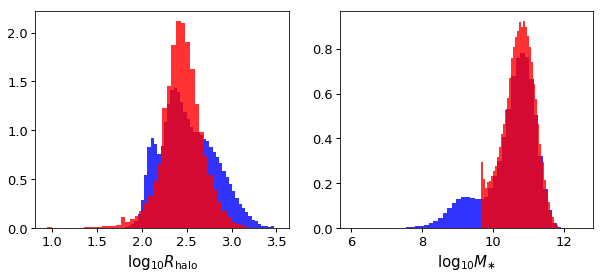

In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

__=ax1.hist(np.log10(sdss['rvir_halo_kpc']), bins=50, normed=True, color='blue', alpha=0.8)
__=ax1.hist(np.log10(mock['rvir_halo_kpc'][idx_sm_matched]), bins=50, normed=True, color='red', alpha=0.8)
__=ax2.hist(sdss['sm'], bins=50, normed=True, color='blue', alpha=0.8)
__=ax2.hist(np.log10(mock['sm'][idx_sm_matched]), bins=50, normed=True, color='red', alpha=0.8)

xlabel1 = ax1.set_xlabel(r'$\log_{10}R_{\rm halo}$')
xlabel2 = ax2.set_xlabel(r'$\log_{10}M_{\ast}$')

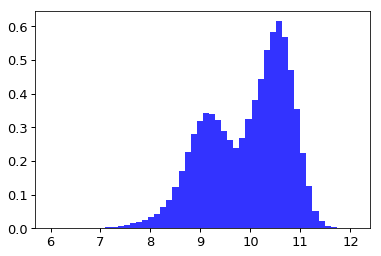

In [24]:
fig, ax = plt.subplots(1, 1)

sdss_sm = sdss['sm'][sdss['ssfr'] > -10.75]
__=ax.hist(sdss_sm, bins=50, normed=True, color='blue', alpha=0.8)
# __=ax1.hist(np.log10(mock['rvir_halo_kpc'][idx_sm_matched]), bins=50, normed=True, color='red', alpha=0.8)
# __=ax2.hist(sdss['sm'], bins=50, normed=True, color='blue', alpha=0.8)
# __=ax2.hist(np.log10(mock['sm'][idx_sm_matched]), bins=50, normed=True, color='red', alpha=0.8)

# xlabel1 = ax1.set_xlabel(r'$\log_{10}R_{\rm halo}$')
# xlabel2 = ax2.set_xlabel(r'$\log_{10}M_{\ast}$')

In [26]:
sdss_sm.max()

12.0929762223148